In [12]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

cmap = plt.get_cmap('Set1')

Stats = ['simSeconds ',
'hostSeconds ',
'system.mem_ctrl.readReqs ',
'system.mem_ctrl.writeReqs ',
'system.mem_ctrl.servicedByWrQ ',
'system.mem_ctrl.mergedWrBursts ',
'system.mem_ctrl.numTotHits ',
'system.mem_ctrl.numTotMisses ',
'system.mem_ctrl.numColdMisses ',
'system.mem_ctrl.numHotMisses ',
'system.mem_ctrl.numRdMissClean ',
'system.mem_ctrl.numRdMissDirty ',
'system.mem_ctrl.numRdHit ',
'system.mem_ctrl.numWrMissClean ',
'system.mem_ctrl.numWrMissDirty ',
'system.mem_ctrl.numWrHit ',
'system.mem_ctrl.numRdHitDirty ',
'system.mem_ctrl.numRdHitClean ',
'system.mem_ctrl.numWrHitDirty ',
'system.mem_ctrl.numWrHitClean ',
'system.o3Cpu0.thread_0.numInsts ',
'system.o3Cpu1.thread_0.numInsts ',
'system.o3Cpu2.thread_0.numInsts ',
'system.o3Cpu3.thread_0.numInsts ',
'system.o3Cpu4.thread_0.numInsts ',
'system.o3Cpu5.thread_0.numInsts ',
'system.o3Cpu6.thread_0.numInsts ',
'system.o3Cpu7.thread_0.numInsts ',
'system.mem_ctrl.avgRdBWSys ',
'system.mem_ctrl.avgWrBWSys ',
'system.mem_ctrl.avgORBLen ',
'system.far_mem_ctrl.avgRdBWSys ',
'system.far_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.avgRdBWSys ',
'system.loc_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.dram.readBursts ',
'system.loc_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram_2.readBursts ',
'system.loc_mem_ctrl.dram_2.writeBursts ',
'system.far_mem_ctrl.dram.readBursts ',
'system.far_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram.avgRdBW ',
'system.loc_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram_2.avgRdBW ',
'system.loc_mem_ctrl.dram_2.avgWrBW ',
'system.far_mem_ctrl.dram.avgRdBW ',
'system.far_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram.busUtil ',
'system.loc_mem_ctrl.dram.busUtilRead ',
'system.loc_mem_ctrl.dram.busUtilWrite ',
'system.loc_mem_ctrl.dram_2.busUtil ',
'system.loc_mem_ctrl.dram_2.busUtilRead ',
'system.loc_mem_ctrl.dram_2.busUtilWrite ',
'system.far_mem_ctrl.dram.busUtil ',
'system.far_mem_ctrl.dram.busUtilRead ',
'system.far_mem_ctrl.dram.busUtilWrite ',
'system.far_mem_ctrl.dram.bytesRead  ',
'system.far_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram.bytesRead  ',
'system.loc_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram_2.bytesRead  ',
'system.loc_mem_ctrl.dram_2.bytesWritten  ',
'system.mem_ctrl.avgTimeTagCheckRes ',
'system.mem_ctrl.avgTimeTagCheckResRd ',
'system.mem_ctrl.avgTimeTagCheckResWr ',
'system.mem_ctrl.avgPktRespTimeRd ',
'system.mem_ctrl.avgPktRespTimeWr ',
'system.mem_ctrl.avgPktORBTime ',
'system.mem_ctrl.avgPktORBTimeRd ',
'system.mem_ctrl.avgPktORBTimeWr ',
'system.mem_ctrl.avgTimeInLocRead ',
'system.mem_ctrl.avgTimeInLocWrite ',
'system.mem_ctrl.avgTimeInFarRead '
          ]

dfCols = [
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen',
         'farAvgRdBWSys',
         'farAvgWrBWSys',
         'locAvgRdBWSys',
         'locAvgWrBWSys',
         'readBursts1',
         'writeBursts1',
         'readBursts2',
         'writeBursts2',
         'readBursts3',
         'writeBursts3',
         'loc1AvgRdBW',
         'loc1AvgWrBW',
         'loc2AvgRdBW',
         'loc2AvgWrBW',
         'farAvgRdBW',
         'farAvgWrBW',
         'loc1BusUtil',
         'loc1BusUtilRead',
         'loc1BusUtilWrite',
         'loc2BusUtil',
         'loc2BusUtilRead',
         'loc2BusUtilWrite',
         'farBusUtil',
         'farBusUtilRead',
         'farBusUtilWrite',
         'farBytesRead',
         'farBytesWritten',
         'loc1BytesRead',
         'loc1BytesWritten',
         'loc2BytesRead',
         'loc2BytesWritten',
         'avgTimeTagCheckRes',
         'avgTimeTagCheckResRd',
         'avgTimeTagCheckResWr',
         'avgPktRespTimeRd',
         'avgPktRespTimeWr',
         'avgPktORBTime',
         'avgPktORBTimeRd',
         'avgPktORBTimeWr',
         'avgTimeInLocRead',
         'avgTimeInLocWrite',
         'avgTimeInFarRead'

         ]
##########################################################

def getStat(filename, stat, index):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        x = 0
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l and x < (index-1):
                    x = x+1
                elif stat in l and x == (index-1):
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

##########################################################

def creatDataFrame(dataDir, suite, index):
    app = []
    if suite == "GAPBS":
        app = ['bc', 'bfs', 'cc', 'pr', 'sssp', 'tc']
    if suite == "NPB":
        app = ['bt', 'cg', 'ft', 'is', 'lu', 'mg', 'sp', 'ua']
    rows = []
    i = 0
    for a in app:
        stats = [a]
        for stat in Stats:
            time_file_path = '{}/{}/stats.txt'.format(dataDir, a)
            ret_line = getStat(time_file_path, stat, index[i])

            if ret_line != 0:
                #if ret_line=='nan' :
                #    stat_val = 0
                #else:
                stat_val = ret_line.split()[1]
            else:
                stat_val = 0
            stats.append(stat_val)

        rows.append(stats)
        i = i+1
    df = pd.DataFrame(rows, columns= dfCols)
    df['totNumInsts'] = df['numInsts0'].astype(int)+df['numInsts1'].astype(int)+df['numInsts2'].astype(int)+df['numInsts3'].astype(int)+df['numInsts4'].astype(int)+df['numInsts5'].astype(int)+df['numInsts6'].astype(int)+df['numInsts7'].astype(int)
    df['totBW'] = (df['avgRdBWSys'].astype(float)+df['avgWrBWSys'].astype(float))/1000000000
    df['coldRate'] = (df['numColdMisses'].astype(float) / df['numTotMisses'].astype(float)) *100
    df['injRate'] = (df['readReqs'].astype(float) + df['writeReqs'].astype(float))*64/1000000000 / df['simSeconds'].astype(float)
    df['BIPS'] = (df['totNumInsts'].astype(float)/1000000000)/df['simSeconds'].astype(float)
    
    df['accAmp'] =  (df['farBytesRead'].astype(float) + df['farBytesWritten'].astype(float) +
                     df['loc1BytesRead'].astype(float) + df['loc1BytesWritten'].astype(float) + 
                     df['loc2BytesRead'].astype(float) + df['loc2BytesWritten'].astype(float)) / (df['readReqs'].astype(float) * 64 + df['writeReqs'].astype(float) * 64)
    
    df['BWBloat'] =  (df['loc1AvgRdBW'].astype(float) + df['loc1AvgWrBW'].astype(float) +
                      df['loc2AvgRdBW'].astype(float) + df['loc2AvgWrBW'].astype(float) +
                      df['farAvgRdBW'].astype(float) + df['farAvgWrBW'].astype(float)) / ((df['avgRdBWSys'].astype(float) + df['avgWrBWSys'].astype(float)) / 1000000)
    return df

In [13]:
df_gap22_dc_1 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/1/GAPBS", "GAPBS", [4,5,3,4,5,12])
df_npbC_dc_1 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/1/NPB", "NPB", [7,5,3,6,3,7,8,6])
df_gap22_dc_2 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/2/GAPBS", "GAPBS", [5,5,3,4,5,12])
df_npbC_dc_2 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/2/NPB", "NPB",[7,6,2,5,3,7,8,6])
df_gap22_dc_8 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/8/GAPBS", "GAPBS", [5,5,3,4,5,12])
df_npbC_dc_8 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/8/NPB", "NPB",[7,6,2,6,3,7,8,6])
df_gap22_dc_16 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/16/GAPBS", "GAPBS", [5,5,3,4,5,12])
df_npbC_dc_16 = creatDataFrame("/home/babaie/projects/rambusDesign/x86Fixed/set-asso-data/set-Assoc-Res/128MiB_16GB_g22_nC/16/NPB", "NPB", [7,6,2,6,3,7,8,6])

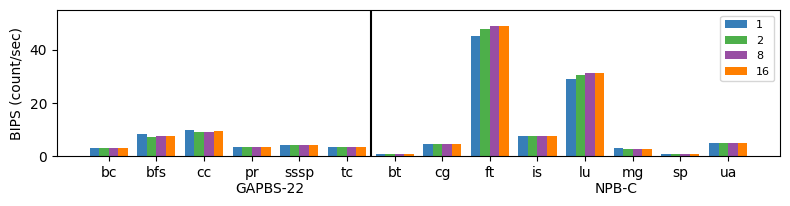

In [22]:
app_gap = df_gap22_dc_1['app']
gap_1 = df_gap22_dc_1['BIPS']
gap_2 = df_gap22_dc_2['BIPS']
gap_8 = df_gap22_dc_8['BIPS']
gap_16 = df_gap22_dc_16['BIPS']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,55])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = df_npbC_dc_1['BIPS']
npb_2 = df_npbC_dc_2['BIPS']
npb_8 = df_npbC_dc_8['BIPS']
npb_16 = df_npbC_dc_16['BIPS']
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("BIPS (count/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

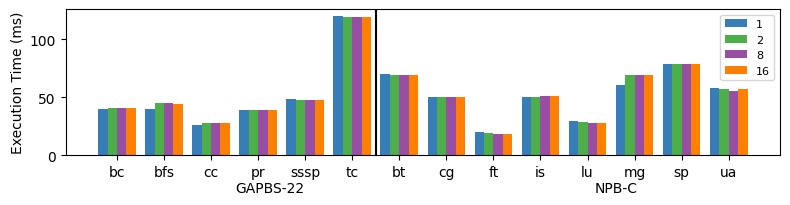

In [30]:
app_gap = df_gap22_dc_1['app']
gap_1 = df_gap22_dc_1['simSeconds'].astype(float)*1000
gap_2 = df_gap22_dc_2['simSeconds'].astype(float)*1000
gap_8 = df_gap22_dc_8['simSeconds'].astype(float)*1000
gap_16 = df_gap22_dc_16['simSeconds'].astype(float)*1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

#plt.ylim([0,200])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = df_npbC_dc_1['simSeconds'].astype(float)*1000
npb_2 = df_npbC_dc_2['simSeconds'].astype(float)*1000
npb_8 = df_npbC_dc_8['simSeconds'].astype(float)*1000
npb_16 = df_npbC_dc_16['simSeconds'].astype(float)*1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Execution Time (ms)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

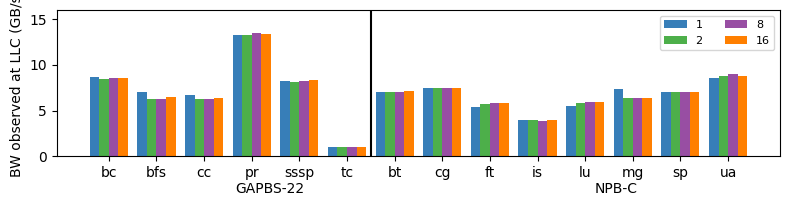

In [34]:
app_gap = df_gap22_dc_1['app']
gap_1 = df_gap22_dc_1['totBW']
gap_2 = df_gap22_dc_2['totBW']
gap_8 = df_gap22_dc_8['totBW']
gap_16 = df_gap22_dc_16['totBW']

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,16])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = df_npbC_dc_1['totBW']
npb_2 = df_npbC_dc_2['totBW']
npb_8 = df_npbC_dc_8['totBW']
npb_16 = df_npbC_dc_16['totBW']
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("BW observed at LLC (GB/s)")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

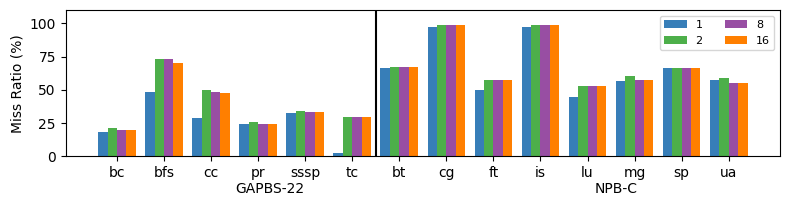

In [37]:
app_gap = df_gap22_dc_1['app']
gap_1 = 100 * df_gap22_dc_1['numTotMisses'].astype(float) / (df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
gap_2 = 100 * df_gap22_dc_2['numTotMisses'].astype(float) / (df_gap22_dc_2['numTotMisses'].astype(float)+df_gap22_dc_2['numTotHits'].astype(float))
gap_8 = 100 * df_gap22_dc_8['numTotMisses'].astype(float) / (df_gap22_dc_8['numTotMisses'].astype(float)+df_gap22_dc_8['numTotHits'].astype(float))
gap_16 = 100 * df_gap22_dc_16['numTotMisses'].astype(float) / (df_gap22_dc_16['numTotMisses'].astype(float)+df_gap22_dc_16['numTotHits'].astype(float))


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,110])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = 100 * df_npbC_dc_1['numTotMisses'].astype(float) / (df_npbC_dc_1['numTotMisses'].astype(float)+df_npbC_dc_1['numTotHits'].astype(float))
npb_2 = 100 * df_npbC_dc_2['numTotMisses'].astype(float) / (df_npbC_dc_2['numTotMisses'].astype(float)+df_npbC_dc_2['numTotHits'].astype(float))
npb_8 = 100 * df_npbC_dc_8['numTotMisses'].astype(float) / (df_npbC_dc_8['numTotMisses'].astype(float)+df_npbC_dc_8['numTotHits'].astype(float))
npb_16 = 100 * df_npbC_dc_16['numTotMisses'].astype(float) / (df_npbC_dc_16['numTotMisses'].astype(float)+df_npbC_dc_16['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Miss Ratio (%)")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

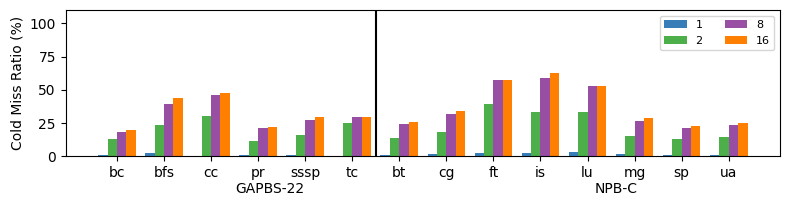

In [39]:
app_gap = df_gap22_dc_1['app']
gap_1 = 100 * df_gap22_dc_1['numColdMisses'].astype(float) / (df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
gap_2 = 100 * df_gap22_dc_2['numColdMisses'].astype(float) / (df_gap22_dc_2['numTotMisses'].astype(float)+df_gap22_dc_2['numTotHits'].astype(float))
gap_8 = 100 * df_gap22_dc_8['numColdMisses'].astype(float) / (df_gap22_dc_8['numTotMisses'].astype(float)+df_gap22_dc_8['numTotHits'].astype(float))
gap_16 = 100 * df_gap22_dc_16['numColdMisses'].astype(float) / (df_gap22_dc_16['numTotMisses'].astype(float)+df_gap22_dc_16['numTotHits'].astype(float))


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,110])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = 100 * df_npbC_dc_1['numColdMisses'].astype(float) / (df_npbC_dc_1['numTotMisses'].astype(float)+df_npbC_dc_1['numTotHits'].astype(float))
npb_2 = 100 * df_npbC_dc_2['numColdMisses'].astype(float) / (df_npbC_dc_2['numTotMisses'].astype(float)+df_npbC_dc_2['numTotHits'].astype(float))
npb_8 = 100 * df_npbC_dc_8['numColdMisses'].astype(float) / (df_npbC_dc_8['numTotMisses'].astype(float)+df_npbC_dc_8['numTotHits'].astype(float))
npb_16 = 100 * df_npbC_dc_16['numColdMisses'].astype(float) / (df_npbC_dc_16['numTotMisses'].astype(float)+df_npbC_dc_16['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Cold Miss Ratio (%)")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

0    34164.0
1    99927.0
2     1004.0
3    93298.0
4    70901.0
5      152.0
Name: numColdMisses, dtype: float64


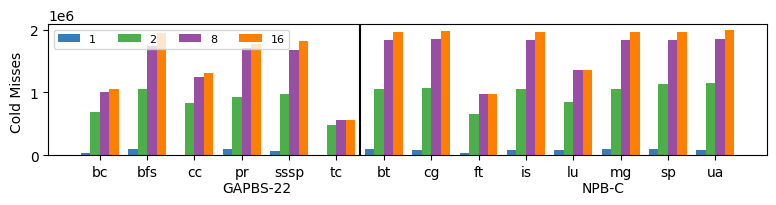

In [45]:
app_gap = df_gap22_dc_1['app']
gap_1 = df_gap22_dc_1['numColdMisses'].astype(float)
print(gap_1)
gap_2 = df_gap22_dc_2['numColdMisses'].astype(float)
gap_8 = df_gap22_dc_8['numColdMisses'].astype(float)
gap_16 = df_gap22_dc_16['numColdMisses'].astype(float)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

#plt.ylim([0,110])
for i,app in enumerate(app_gap):
    plt.bar(i*5,   gap_1[i],   width=1, color=cmap(1), label='1' if i==0 else None)
    plt.bar(i*5+1, gap_2[i],   width=1, color=cmap(2), label='2' if i==0 else None)
    plt.bar(i*5+2, gap_8[i],   width=1, color=cmap(3), label='8' if i==0 else None)
    plt.bar(i*5+3, gap_16[i],  width=1, color=cmap(4), label='16' if i==0 else None)

offset = i*6-1
app_npb = df_npbC_dc_1['app']
npb_1 = df_npbC_dc_1['numColdMisses'].astype(float)
npb_2 = df_npbC_dc_2['numColdMisses'].astype(float)
npb_8 = df_npbC_dc_8['numColdMisses'].astype(float)
npb_16 = df_npbC_dc_16['numColdMisses'].astype(float)

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*5+1,   npb_1[i],     width=1, color=cmap(1))
    plt.bar(offset+i*5+2,   npb_2[i],   width=1, color=cmap(2))
    plt.bar(offset+i*5+3,   npb_8[i],   width=1, color=cmap(3))
    plt.bar(offset+i*5+4,   npb_16[i],   width=1, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*5+1.5, list(app_gap)+list(app_npb))
plt.axvline(x=offset, color='black')

plt.ylabel("Cold Misses ")
plt.legend(fontsize=8, ncol=4)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

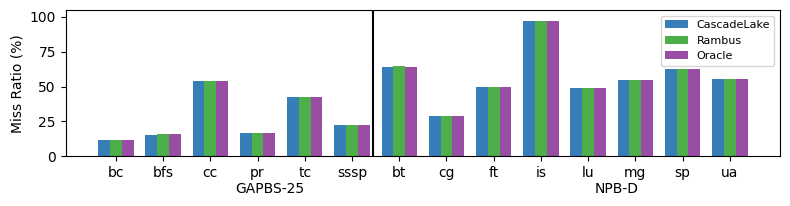

In [17]:
app_gap = df_gap25_dc_cas['app']
gap_cas = 100 * df_gap25_dc_cas['numTotMisses'].astype(float) / (df_gap25_dc_cas['numTotMisses'].astype(float)+df_gap25_dc_cas['numTotHits'].astype(float))
gap_ram = 100 * df_gap25_dc_ram['numTotMisses'].astype(float) / (df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
gap_orc = 100 * df_gap25_dc_orc['numTotMisses'].astype(float) / (df_gap25_dc_orc['numTotMisses'].astype(float)+df_gap25_dc_orc['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,105])
for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbD_dc_cas['app']
npb_cas = 100 * df_npbD_dc_cas['numTotMisses'].astype(float) / (df_npbD_dc_cas['numTotMisses'].astype(float)+df_npbD_dc_cas['numTotHits'].astype(float))
npb_ram = 100 * df_npbD_dc_ram['numTotMisses'].astype(float) / (df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
npb_orc = 100 * df_npbD_dc_orc['numTotMisses'].astype(float) / (df_npbD_dc_orc['numTotMisses'].astype(float)+df_npbD_dc_orc['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Ratio (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

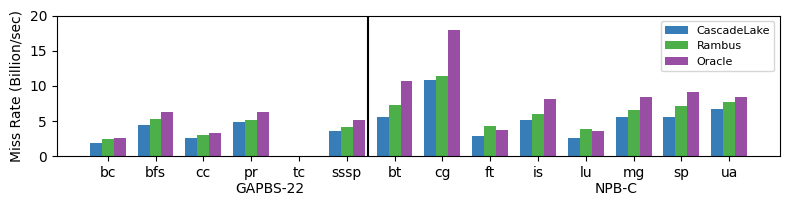

In [18]:
app_gap = df_gap22_dc_cas['app']
gap_cas = 100 * df_gap22_dc_cas['numTotMisses'].astype(float) / (df_gap22_dc_cas['simSeconds'].astype(float)) / 1000000000
gap_ram = 100 * df_gap22_dc_1['numTotMisses'].astype(float) / (df_gap22_dc_1['simSeconds'].astype(float)) / 1000000000
gap_orc = 100 * df_gap22_dc_orc['numTotMisses'].astype(float) / (df_gap22_dc_orc['simSeconds'].astype(float)) / 1000000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,20])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_dc_cas['app']
npb_cas = 100 * df_npbC_dc_cas['numTotMisses'].astype(float) / (df_npbC_dc_cas['simSeconds'].astype(float)) / 1000000000
npb_ram = 100 * df_npbC_dc_ram_1['numTotMisses'].astype(float) / (df_npbC_dc_ram_1['simSeconds'].astype(float)) / 1000000000
npb_orc = 100 * df_npbC_dc_orc['numTotMisses'].astype(float) / (df_npbC_dc_orc['simSeconds'].astype(float)) / 1000000000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Rate (Billion/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

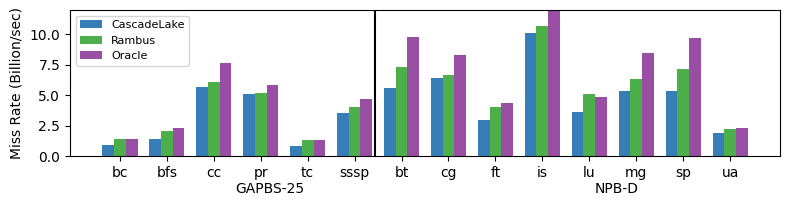

In [43]:
app_gap = df_gap25_dc_cas['app']
gap_cas = 100 * df_gap25_dc_cas['numTotMisses'].astype(float) / (df_gap25_dc_cas['simSeconds'].astype(float)) / 1000000000
gap_ram = 100 * df_gap25_dc_ram['numTotMisses'].astype(float) / (df_gap25_dc_ram['simSeconds'].astype(float)) / 1000000000
gap_orc = 100 * df_gap25_dc_orc['numTotMisses'].astype(float) / (df_gap25_dc_orc['simSeconds'].astype(float)) / 1000000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,20])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbD_dc_cas['app']
npb_cas = 100 * df_npbD_dc_cas['numTotMisses'].astype(float) / (df_npbD_dc_cas['simSeconds'].astype(float)) / 1000000000
npb_ram = 100 * df_npbD_dc_ram['numTotMisses'].astype(float) / (df_npbD_dc_ram['simSeconds'].astype(float)) / 1000000000
npb_orc = 100 * df_npbD_dc_orc['numTotMisses'].astype(float) / (df_npbD_dc_orc['simSeconds'].astype(float)) / 1000000000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Rate (Billion/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

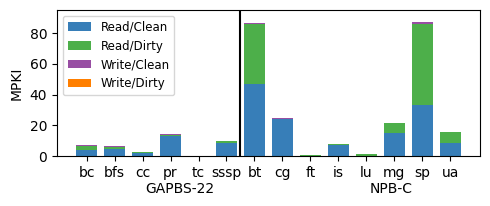

In [20]:
x1 = df_gap22_dc_1['app']
y1 = df_gap22_dc_1['numRdMissClean'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)
y2 = df_gap22_dc_1['numRdMissDirty'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)
y3 = df_gap22_dc_1['numWrMissClean'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)
y4 = df_gap22_dc_1['numWrMissDirty'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,95])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_dc_ram_1['app']
y1 = df_npbC_dc_ram_1['numRdMissClean'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)
y2 = df_npbC_dc_ram_1['numRdMissDirty'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)
y3 = df_npbC_dc_ram_1['numWrMissClean'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)
y4 = df_npbC_dc_ram_1['numWrMissDirty'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))


plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("MPKI")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

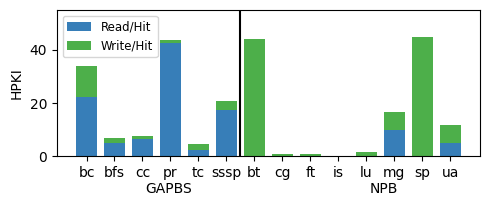

In [21]:
x1 = df_gap22_dc_1['app']
y1 = df_gap22_dc_1['numRdHitClean'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000) + df_gap22_dc_1['numRdHitDirty'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)
y2 = df_gap22_dc_1['numWrHitClean'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000) + df_gap22_dc_1['numWrHitDirty'].astype(float)/((df_gap22_dc_1['totNumInsts'])/1000)


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

plt.ylim([0,55])
for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Hit' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write/Hit' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_dc_ram_1['app']
y1 = df_npbC_dc_ram_1['numRdHitClean'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000) + df_npbC_dc_ram_1['numRdHitDirty'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)
y2 = df_npbC_dc_ram_1['numWrHitClean'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000) + df_npbC_dc_ram_1['numWrHitDirty'].astype(float)/((df_npbC_dc_ram_1['totNumInsts'])/1000)

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("HPKI")
plt.legend(fontsize=8.5, ncol=1)
plt.tight_layout()

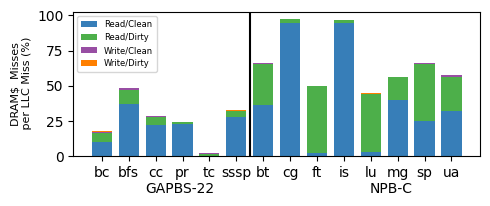

In [22]:
x1 = df_gap22_dc_1['app']
y1 = 100 * df_gap22_dc_1['numRdMissClean'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y2 = 100 * df_gap22_dc_1['numRdMissDirty'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y3 = 100 * df_gap22_dc_1['numWrMissClean'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y4 = 100 * df_gap22_dc_1['numWrMissDirty'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_dc_ram_1['app']
y1 = 100 * df_npbC_dc_ram_1['numRdMissClean'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y2 = 100 * df_npbC_dc_ram_1['numRdMissDirty'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y3 = 100 * df_npbC_dc_ram_1['numWrMissClean'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y4 = 100 * df_npbC_dc_ram_1['numWrMissDirty'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM$  Misses\n per LLC Miss (%)", fontsize=8)
plt.legend(fontsize=6, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

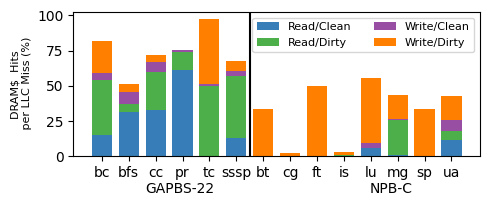

In [23]:
x1 = df_gap22_dc_1['app']
y1 = 100 * df_gap22_dc_1['numRdHitClean'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y2 = 100 * df_gap22_dc_1['numRdHitDirty'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y3 = 100 * df_gap22_dc_1['numWrHitClean'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y4 = 100 * df_gap22_dc_1['numWrHitDirty'].astype(float)/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_dc_ram_1['app']
y1 = 100 * df_npbC_dc_ram_1['numRdHitDirty'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y2 = 100 * df_npbC_dc_ram_1['numRdHitClean'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y3 = 100 * df_npbC_dc_ram_1['numWrHitDirty'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y4 = 100 * df_npbC_dc_ram_1['numWrHitClean'].astype(float)/(df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM$  Hits\n per LLC Miss (%)", fontsize=8)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

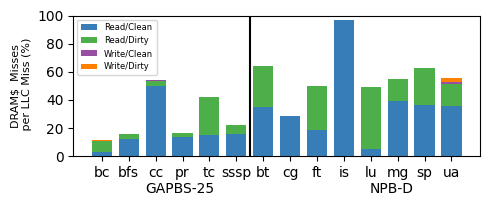

In [24]:
x1 = df_gap25_dc_ram['app']
y1 = 100 * df_gap25_dc_ram['numRdMissClean'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y2 = 100 * df_gap25_dc_ram['numRdMissDirty'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y3 = 100 * df_gap25_dc_ram['numWrMissClean'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y4 = 100 * df_gap25_dc_ram['numWrMissDirty'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)
plt.ylim([0,100])

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbD_dc_ram['app']
y1 = 100 * df_npbD_dc_ram['numRdMissClean'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y2 = 100 * df_npbD_dc_ram['numRdMissDirty'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y3 = 100 * df_npbD_dc_ram['numWrMissClean'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y4 = 100 * df_npbD_dc_ram['numWrMissDirty'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM$  Misses\n per LLC Miss (%)", fontsize=8)
plt.legend(fontsize=6, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

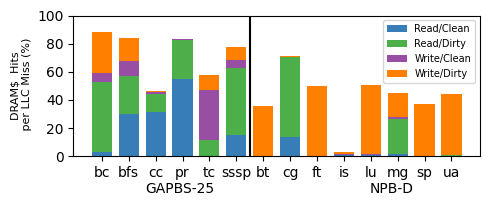

In [25]:
x1 = df_gap25_dc_ram['app']
y1 = 100 * df_gap25_dc_ram['numRdHitClean'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y2 = 100 * df_gap25_dc_ram['numRdHitDirty'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y3 = 100 * df_gap25_dc_ram['numWrHitClean'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))
y4 = 100 * df_gap25_dc_ram['numWrHitDirty'].astype(float)/(df_gap25_dc_ram['numTotMisses'].astype(float)+df_gap25_dc_ram['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)
plt.ylim([0,100])

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Clean' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Read/Dirty' if i==0 else None)
    plt.bar(i*4, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3), label='Write/Clean' if i==0 else None)
    plt.bar(i*4, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4), label='Write/Dirty' if i==0 else None)

offset = (i+1)*4
x2 = df_npbD_dc_ram['app']
y1 = 100 * df_npbD_dc_ram['numRdHitDirty'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y2 = 100 * df_npbD_dc_ram['numRdHitClean'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y3 = 100 * df_npbD_dc_ram['numWrHitDirty'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
y4 = 100 * df_npbD_dc_ram['numWrHitClean'].astype(float)/(df_npbD_dc_ram['numTotMisses'].astype(float)+df_npbD_dc_ram['numTotHits'].astype(float))
for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))
    plt.bar(i*4+offset, y3[i], bottom = y1[i]+y2[i], width=3, color=cmap(3))
    plt.bar(i*4+offset, y4[i], bottom = y1[i]+y2[i]+y3[i], width=3, color=cmap(4))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM$  Hits\n per LLC Miss (%)", fontsize=8)
plt.legend(fontsize=7, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_mpki.pdf")

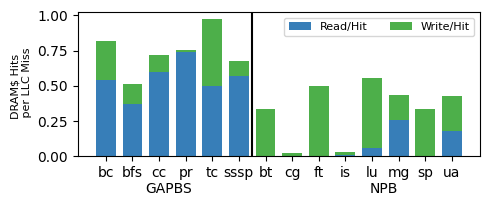

In [26]:
x1 = df_gap22_dc_1['app']
y1 = (df_gap22_dc_1['numRdHitClean'].astype(float) + df_gap22_dc_1['numRdHitDirty'].astype(float))/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))
y2 = (df_gap22_dc_1['numWrHitClean'].astype(float) + df_gap22_dc_1['numWrHitDirty'].astype(float))/(df_gap22_dc_1['numTotMisses'].astype(float)+df_gap22_dc_1['numTotHits'].astype(float))


# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(5,2)

for i,app in enumerate(x1): 
    plt.bar(i*4, y1[i], width=3, color=cmap(1), label='Read/Hit' if i==0 else None)
    plt.bar(i*4, y2[i], bottom = y1[i], width=3, color=cmap(2), label='Write/Hit' if i==0 else None)

offset = (i+1)*4
x2 = df_npbC_dc_ram_1['app']
y1 = (df_npbC_dc_ram_1['numRdHitClean'].astype(float) + df_npbC_dc_ram_1['numRdHitDirty'].astype(float)) / (df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))
y2 = (df_npbC_dc_ram_1['numWrHitClean'].astype(float) + df_npbC_dc_ram_1['numWrHitDirty'].astype(float)) / (df_npbC_dc_ram_1['numTotMisses'].astype(float)+df_npbC_dc_ram_1['numTotHits'].astype(float))

for i,app in enumerate(x2): 
    plt.bar(i*4+offset, y1[i], width=3, color=cmap(1))
    plt.bar(i*4+offset, y2[i], bottom = y1[i], width=3, color=cmap(2))


plt.figtext(0.3, 0.01, "GAPBS")
plt.figtext(0.75, 0.01, "NPB")

plt.xticks(np.arange(14)*4, list(x1)+list(x2))
plt.axvline(x=offset-2, color='black')

plt.ylabel("DRAM$ Hits \n per LLC Miss", fontsize=8)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()

In [27]:
def gmean(x, size):
    y = 1
    for i in range(size):
        y = x[i] * y
    return y**(1/size)

print("\n--------------------simSecond\n")

gap_cas = df_gap22_dc_cas['simSeconds'].astype(float)
gap_ram = df_gap22_dc_1['simSeconds'].astype(float)
npb_cas = df_npbC_dc_cas['simSeconds'].astype(float)
npb_ram = df_npbC_dc_ram_1['simSeconds'].astype(float)

print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['simSeconds'].astype(float)
gap_ram = df_gap25_dc_ram['simSeconds'].astype(float)
npb_cas = df_npbD_dc_cas['simSeconds'].astype(float)
npb_ram = df_npbD_dc_ram['simSeconds'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

print("\n--------------------BIPS\n")

gap_cas = df_gap22_dc_cas['BIPS'].astype(float)
gap_ram = df_gap22_dc_1['BIPS'].astype(float)
npb_cas = df_npbC_dc_cas['BIPS'].astype(float)
npb_ram = df_npbC_dc_ram_1['BIPS'].astype(float)


print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['BIPS'].astype(float)
gap_ram = df_gap25_dc_ram['BIPS'].astype(float)
npb_cas = df_npbD_dc_cas['BIPS'].astype(float)
npb_ram = df_npbD_dc_ram['BIPS'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

print("\n--------------------avgTimeTagCheckResRd\n")

gap_cas = df_gap22_dc_cas['avgTimeTagCheckResRd'].astype(float)
gap_ram = df_gap22_dc_1['avgTimeTagCheckResRd'].astype(float)
npb_cas = df_npbC_dc_cas['avgTimeTagCheckResRd'].astype(float)
npb_ram = df_npbC_dc_ram_1['avgTimeTagCheckResRd'].astype(float)

print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['avgTimeTagCheckResRd'].astype(float)
gap_ram = df_gap25_dc_ram['avgTimeTagCheckResRd'].astype(float)
npb_cas = df_npbD_dc_cas['avgTimeTagCheckResRd'].astype(float)
npb_ram = df_npbD_dc_ram['avgTimeTagCheckResRd'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

print("\n--------------------avgPktRespTimeRd\n")

gap_cas = df_gap22_dc_cas['avgPktRespTimeRd'].astype(float)
gap_ram = df_gap22_dc_1['avgPktRespTimeRd'].astype(float)
npb_cas = df_npbC_dc_cas['avgPktRespTimeRd'].astype(float)
npb_ram = df_npbC_dc_ram_1['avgPktRespTimeRd'].astype(float)


print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['avgPktRespTimeRd'].astype(float)
gap_ram = df_gap25_dc_ram['avgPktRespTimeRd'].astype(float)
npb_cas = df_npbD_dc_cas['avgPktRespTimeRd'].astype(float)
npb_ram = df_npbD_dc_ram['avgPktRespTimeRd'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

print("\n--------------------avgTimeInLocWrite\n")

gap_cas = df_gap22_dc_cas['avgTimeInLocWrite'].astype(float)
gap_ram = df_gap22_dc_1['avgTimeInLocWrite'].astype(float)
npb_cas = df_npbC_dc_cas['avgTimeInLocWrite'].astype(float)
npb_ram = df_npbC_dc_ram_1['avgTimeInLocWrite'].astype(float)


print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['avgTimeInLocWrite'].astype(float)
gap_ram = df_gap25_dc_ram['avgTimeInLocWrite'].astype(float)
npb_cas = df_npbD_dc_cas['avgTimeInLocWrite'].astype(float)
npb_ram = df_npbD_dc_ram['avgTimeInLocWrite'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

print("\n--------------------avgTimeInFarRead\n")

gap_cas = df_gap22_dc_cas['avgTimeInFarRead'].astype(float)
gap_ram = df_gap22_dc_1['avgTimeInFarRead'].astype(float)
npb_cas = df_npbC_dc_cas['avgTimeInFarRead'].astype(float)
npb_ram = df_npbC_dc_ram_1['avgTimeInFarRead'].astype(float)


print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))

gap_cas = df_gap25_dc_cas['avgTimeInFarRead'].astype(float)
gap_ram = df_gap25_dc_ram['avgTimeInFarRead'].astype(float)
npb_cas = df_npbD_dc_cas['avgTimeInFarRead'].astype(float)
npb_ram = df_npbD_dc_ram['avgTimeInFarRead'].astype(float)

print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))



--------------------simSecond

GAPBS 22:  0.8597424157223863
NPB C:    0.800670700152863
GAPBS 25:  0.78461390785119
NPB D:    0.8164945685257486

--------------------BIPS

GAPBS 22:  1.1586128574081849
NPB C:    1.245073740120327
GAPBS 25:  1.2707067384918294
NPB D:    1.2245450286259882

--------------------avgTimeTagCheckResRd

GAPBS 22:  0.5460503953654128
NPB C:    0.5857816382728387
GAPBS 25:  0.5771003518737482
NPB D:    0.5296805320152852

--------------------avgPktRespTimeRd

GAPBS 22:  0.760998531526101
NPB C:    0.7455725079427343
GAPBS 25:  0.7413925085615577
NPB D:    0.7182544896919778

--------------------avgTimeInLocWrite

GAPBS 22:  0.4143767256226348
NPB C:    1.361045069825735
GAPBS 25:  0.5321260616852009
NPB D:    0.6900703812493204

--------------------avgTimeInFarRead

GAPBS 22:  1.020591243125785
NPB C:    1.0261958843488934
GAPBS 25:  1.0174425693179805
NPB D:    1.0611246517158581


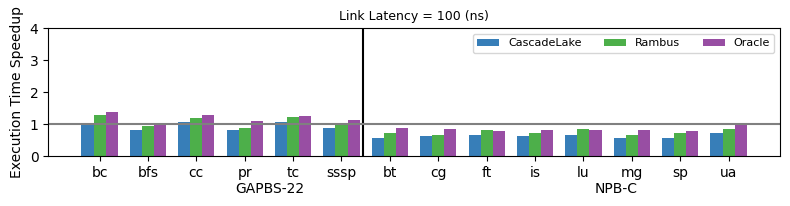

In [28]:
app_gap = df_gap22_cas_100ns['app']
gap_cas = df_gap22_cas_100ns['simSeconds'].astype(float) * 1000
gap_ram = df_gap22_ram_100ns['simSeconds'].astype(float) * 1000
gap_orc = df_gap22_orc_100ns['simSeconds'].astype(float) * 1000
gap_noDC = df_gap22_noDC_100ns['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,4])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_noDC[i]/gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_noDC[i]/gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_noDC[i]/gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_100ns['app']
npb_cas = df_npbC_cas_100ns['simSeconds'].astype(float) * 1000
npb_ram = df_npbC_ram_100ns['simSeconds'].astype(float) * 1000
npb_orc = df_npbC_orc_100ns['simSeconds'].astype(float) * 1000
npb_noDC = df_npbC_noDC_100ns['simSeconds'].astype(float) * 1000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,  npb_noDC[i]/npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,  npb_noDC[i]/npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,  npb_noDC[i]/npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')
plt.axhline(y=1, color='gray')

plt.ylabel("Execution Time Speedup")
plt.title("Link Latency = 100 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

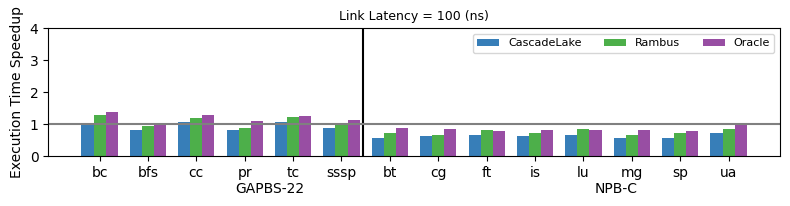

In [29]:
app_gap = df_gap22_cas_100ns['app']
gap_cas = df_gap22_cas_100ns['simSeconds'].astype(float) * 1000
gap_ram = df_gap22_ram_100ns['simSeconds'].astype(float) * 1000
gap_orc = df_gap22_orc_100ns['simSeconds'].astype(float) * 1000
gap_noDC = df_gap22_noDC_100ns['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,4])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_noDC[i]/gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_noDC[i]/gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_noDC[i]/gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_100ns['app']
npb_cas = df_npbC_cas_100ns['simSeconds'].astype(float) * 1000
npb_ram = df_npbC_ram_100ns['simSeconds'].astype(float) * 1000
npb_orc = df_npbC_orc_100ns['simSeconds'].astype(float) * 1000
npb_noDC = df_npbC_noDC_100ns['simSeconds'].astype(float) * 1000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,  npb_noDC[i]/npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,  npb_noDC[i]/npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,  npb_noDC[i]/npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')
plt.axhline(y=1, color='gray')

plt.ylabel("Execution Time Speedup")
plt.title("Link Latency = 100 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

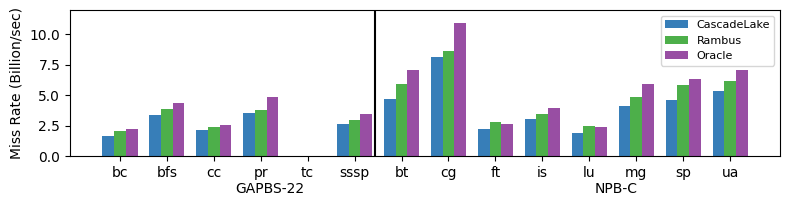

In [30]:
app_gap = df_gap22_cas_100ns['app']
gap_cas = 100 * df_gap22_cas_100ns['numTotMisses'].astype(float) / (df_gap22_cas_100ns['simSeconds'].astype(float)) / 1000000000
gap_ram = 100 * df_gap22_ram_100ns['numTotMisses'].astype(float) / (df_gap22_ram_100ns['simSeconds'].astype(float)) / 1000000000
gap_orc = 100 * df_gap22_orc_100ns['numTotMisses'].astype(float) / (df_gap22_orc_100ns['simSeconds'].astype(float)) / 1000000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,12])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_100ns['app']
npb_cas = 100 * df_npbC_cas_100ns['numTotMisses'].astype(float) / (df_npbC_cas_100ns['simSeconds'].astype(float)) / 1000000000
npb_ram = 100 * df_npbC_ram_100ns['numTotMisses'].astype(float) / (df_npbC_ram_100ns['simSeconds'].astype(float)) / 1000000000
npb_orc = 100 * df_npbC_orc_100ns['numTotMisses'].astype(float) / (df_npbC_orc_100ns['simSeconds'].astype(float)) / 1000000000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Rate (Billion/sec)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

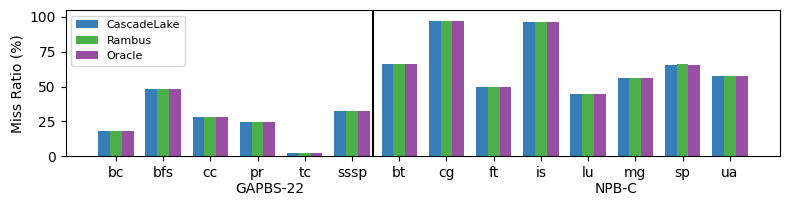

In [31]:
app_gap = df_gap22_cas_100ns['app']
gap_cas = 100 * df_gap22_cas_100ns['numTotMisses'].astype(float) / (df_gap22_cas_100ns['numTotMisses'].astype(float)+df_gap22_cas_100ns['numTotHits'].astype(float))
gap_ram = 100 * df_gap22_ram_100ns['numTotMisses'].astype(float) / (df_gap22_ram_100ns['numTotMisses'].astype(float)+df_gap22_ram_100ns['numTotHits'].astype(float))
gap_orc = 100 * df_gap22_orc_100ns['numTotMisses'].astype(float) / (df_gap22_orc_100ns['numTotMisses'].astype(float)+df_gap22_orc_100ns['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,105])
for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_100ns['app']
npb_cas = 100 * df_npbC_cas_100ns['numTotMisses'].astype(float) / (df_npbC_cas_100ns['numTotMisses'].astype(float)+df_npbC_cas_100ns['numTotHits'].astype(float))
npb_ram = 100 * df_npbC_ram_100ns['numTotMisses'].astype(float) / (df_npbC_ram_100ns['numTotMisses'].astype(float)+df_npbC_ram_100ns['numTotHits'].astype(float))
npb_orc = 100 * df_npbC_orc_100ns['numTotMisses'].astype(float) / (df_npbC_orc_100ns['numTotMisses'].astype(float)+df_npbC_orc_100ns['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Ratio (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

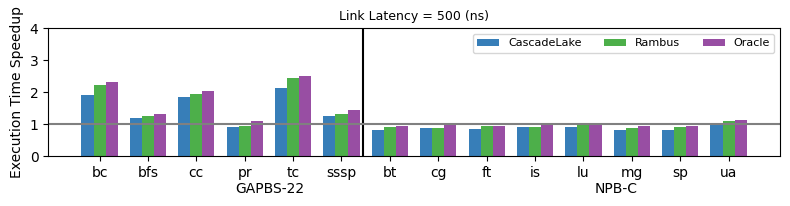

In [32]:
app_gap = df_gap22_cas_500ns['app']
gap_cas = df_gap22_cas_500ns['simSeconds'].astype(float) * 1000
gap_ram = df_gap22_ram_500ns['simSeconds'].astype(float) * 1000
gap_orc = df_gap22_orc_500ns['simSeconds'].astype(float) * 1000
gap_noDC = df_gap22_noDC_500ns['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,4])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_noDC[i]/gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_noDC[i]/gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_noDC[i]/gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_500ns['app']
npb_cas = df_npbC_cas_500ns['simSeconds'].astype(float) * 1000
npb_ram = df_npbC_ram_500ns['simSeconds'].astype(float) * 1000
npb_orc = df_npbC_orc_500ns['simSeconds'].astype(float) * 1000
npb_noDC = df_npbC_noDC_500ns['simSeconds'].astype(float) * 1000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,  npb_noDC[i]/npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,  npb_noDC[i]/npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,  npb_noDC[i]/npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')
plt.axhline(y=1, color='gray')

plt.ylabel("Execution Time Speedup")
plt.title("Link Latency = 500 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

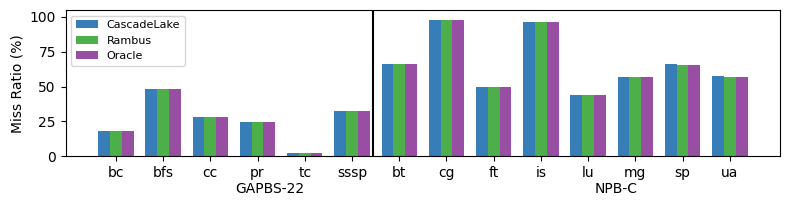

In [33]:
app_gap = df_gap22_cas_500ns['app']
gap_cas = 100 * df_gap22_cas_500ns['numTotMisses'].astype(float) / (df_gap22_cas_500ns['numTotMisses'].astype(float)+df_gap22_cas_500ns['numTotHits'].astype(float))
gap_ram = 100 * df_gap22_ram_500ns['numTotMisses'].astype(float) / (df_gap22_ram_500ns['numTotMisses'].astype(float)+df_gap22_ram_500ns['numTotHits'].astype(float))
gap_orc = 100 * df_gap22_orc_500ns['numTotMisses'].astype(float) / (df_gap22_orc_500ns['numTotMisses'].astype(float)+df_gap22_orc_500ns['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,105])
for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_500ns['app']
npb_cas = 100 * df_npbC_cas_500ns['numTotMisses'].astype(float) / (df_npbC_cas_500ns['numTotMisses'].astype(float)+df_npbC_cas_500ns['numTotHits'].astype(float))
npb_ram = 100 * df_npbC_ram_500ns['numTotMisses'].astype(float) / (df_npbC_ram_500ns['numTotMisses'].astype(float)+df_npbC_ram_500ns['numTotHits'].astype(float))
npb_orc = 100 * df_npbC_orc_500ns['numTotMisses'].astype(float) / (df_npbC_orc_500ns['numTotMisses'].astype(float)+df_npbC_orc_500ns['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Ratio (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

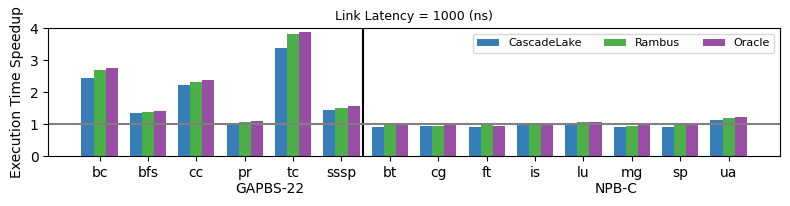

In [34]:
app_gap = df_gap22_cas_1us['app']
gap_cas = df_gap22_cas_1us['simSeconds'].astype(float) * 1000
gap_ram = df_gap22_ram_1us['simSeconds'].astype(float) * 1000
gap_orc = df_gap22_orc_1us['simSeconds'].astype(float) * 1000
gap_noDC = df_gap22_noDC_1us['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)
plt.ylim([0,4])


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_noDC[i]/gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_noDC[i]/gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_noDC[i]/gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_1us['app']
npb_cas = df_npbC_cas_1us['simSeconds'].astype(float) * 1000
npb_ram = df_npbC_ram_1us['simSeconds'].astype(float) * 1000
npb_orc = df_npbC_orc_1us['simSeconds'].astype(float) * 1000
npb_noDC = df_npbC_noDC_1us['simSeconds'].astype(float) * 1000

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,  npb_noDC[i]/npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,  npb_noDC[i]/npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,  npb_noDC[i]/npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')
plt.axhline(y=1, color='gray')

plt.ylabel("Execution Time Speedup")
plt.title("Link Latency = 1000 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=3)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

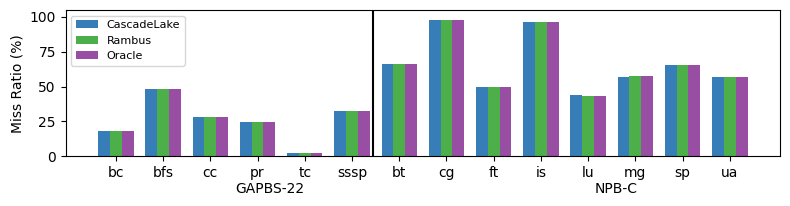

In [35]:
app_gap = df_gap22_cas_1us['app']
gap_cas = 100 * df_gap22_cas_1us['numTotMisses'].astype(float) / (df_gap22_cas_1us['numTotMisses'].astype(float)+df_gap22_cas_1us['numTotHits'].astype(float))
gap_ram = 100 * df_gap22_ram_1us['numTotMisses'].astype(float) / (df_gap22_ram_1us['numTotMisses'].astype(float)+df_gap22_ram_1us['numTotHits'].astype(float))
gap_orc = 100 * df_gap22_orc_1us['numTotMisses'].astype(float) / (df_gap22_orc_1us['numTotMisses'].astype(float)+df_gap22_orc_1us['numTotHits'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)

plt.ylim([0,105])
for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_cas_1us['app']
npb_cas = 100 * df_npbC_cas_1us['numTotMisses'].astype(float) / (df_npbC_cas_1us['numTotMisses'].astype(float)+df_npbC_cas_1us['numTotHits'].astype(float))
npb_ram = 100 * df_npbC_ram_1us['numTotMisses'].astype(float) / (df_npbC_ram_1us['numTotMisses'].astype(float)+df_npbC_ram_1us['numTotHits'].astype(float))
npb_orc = 100 * df_npbC_orc_1us['numTotMisses'].astype(float) / (df_npbC_orc_1us['numTotMisses'].astype(float)+df_npbC_orc_1us['numTotHits'].astype(float))

for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],   width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Miss Ratio (%)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()

In [36]:
print("\n--------------------simSecond 100 ns\n")

gap_cas = df_gap22_cas_100ns['simSeconds'].astype(float)
gap_ram = df_gap22_ram_100ns['simSeconds'].astype(float)
npb_cas =  df_npbC_cas_100ns['simSeconds'].astype(float)
npb_ram =  df_npbC_ram_100ns['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_100ns['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_100ns['simSeconds'].astype(float)

print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
print("......")
print("GAPBS 22 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
print("GAPBS 22 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
print("NPB C ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_noDC,8)))
print("NPB C cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_noDC,8)))

gap_cas = df_gap25_cas_100ns['simSeconds'].astype(float)
gap_ram = df_gap25_ram_100ns['simSeconds'].astype(float)
npb_cas =  df_npbD_cas_100ns['simSeconds'].astype(float)
npb_ram =  df_npbD_ram_100ns['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_100ns['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_100ns['simSeconds'].astype(float)

# print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
# print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("......")
# print("GAPBS 25 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
# print("GAPBS 25 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
# print("NPB D ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("NPB D cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_cas,8)))

print("\n--------------------simSecond 500 ns\n")

gap_cas = df_gap22_cas_500ns['simSeconds'].astype(float)
gap_ram = df_gap22_ram_500ns['simSeconds'].astype(float)
npb_cas =  df_npbC_cas_500ns['simSeconds'].astype(float)
npb_ram =  df_npbC_ram_500ns['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_500ns['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_500ns['simSeconds'].astype(float)

print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
print("......")
print("GAPBS 22 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
print("GAPBS 22 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
print("NPB C ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_noDC,8)))
print("NPB C cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_noDC,8)))

gap_cas = df_gap25_cas_500ns['simSeconds'].astype(float)
gap_ram = df_gap25_ram_500ns['simSeconds'].astype(float)
npb_cas =  df_npbD_cas_500ns['simSeconds'].astype(float)
npb_ram =  df_npbD_ram_500ns['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_500ns['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_500ns['simSeconds'].astype(float)

# print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
# print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("......")
# print("GAPBS 25 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
# print("GAPBS 25 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
# print("NPB D ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("NPB D cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_cas,8)))

print("\n--------------------simSecond 1000 ns\n")

gap_cas = df_gap22_cas_1us['simSeconds'].astype(float)
gap_ram = df_gap22_ram_1us['simSeconds'].astype(float)
npb_cas =  df_npbC_cas_1us['simSeconds'].astype(float)
npb_ram =  df_npbC_ram_1us['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_1us['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_1us['simSeconds'].astype(float)

print("GAPBS 22: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
print("NPB C:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
print("......")
print("GAPBS 22 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
print("GAPBS 22 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
print("NPB C ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_noDC,8)))
print("NPB C cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_noDC,8)))

gap_cas = df_gap25_cas_1us['simSeconds'].astype(float)
gap_ram = df_gap25_ram_1us['simSeconds'].astype(float)
npb_cas =  df_npbD_cas_1us['simSeconds'].astype(float)
npb_ram =  df_npbD_ram_1us['simSeconds'].astype(float)

gap_noDC = df_gap22_noDC_1us['simSeconds'].astype(float)
npb_noDC =  df_npbC_noDC_1us['simSeconds'].astype(float)

# print("GAPBS 25: ", (gmean(gap_ram, 6)) / (gmean(gap_cas,6)))
# print("NPB D:   ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("......")
# print("GAPBS 25 ram: ", (gmean(gap_ram, 6)) / (gmean(gap_noDC,6)))
# print("GAPBS 25 cas: ", (gmean(gap_cas, 6)) / (gmean(gap_noDC,6)))
# print("NPB D ram:    ", (gmean(npb_ram, 8)) / (gmean(npb_cas,8)))
# print("NPB D cas:    ", (gmean(npb_cas, 8)) / (gmean(npb_cas,8)))


--------------------simSecond 100 ns

GAPBS 22:  0.8704941369066823
NPB C:     0.8353860200542975
......
GAPBS 22 ram:  0.9299074115979313
GAPBS 22 cas:  1.0682523548089309
NPB C ram:     1.329913488228752
NPB C cas:     1.5919747952477248

--------------------simSecond 500 ns

GAPBS 22:  0.9242562711180401
NPB C:     0.9342166877437228
......
GAPBS 22 ram:  0.6222679466431472
GAPBS 22 cas:  0.6732634292980363
NPB C ram:     1.058726114676773
NPB C cas:     1.133276817430611

--------------------simSecond 1000 ns

GAPBS 22:  0.946307966189112
NPB C:     0.9538107274446201
......
GAPBS 22 ram:  0.5159358305323501
GAPBS 22 cas:  0.5452092225431446
NPB C ram:     0.9922753361056716
NPB C cas:     1.0403272971820134


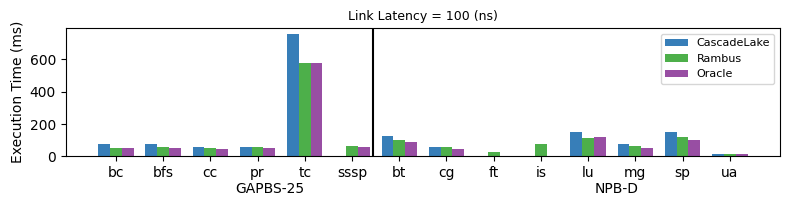

In [37]:
app_gap = df_gap25_cas_100ns['app']
gap_cas = df_gap25_cas_100ns['simSeconds'].astype(float) * 1000
gap_ram = df_gap25_ram_100ns['simSeconds'].astype(float) * 1000
gap_orc = df_gap25_orc_100ns['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbD_cas_100ns['app']
npb_cas = df_npbD_cas_100ns['simSeconds'].astype(float) * 1000
npb_ram = df_npbD_ram_100ns['simSeconds'].astype(float) * 1000
npb_orc = df_npbD_orc_100ns['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("Link Latency = 100 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

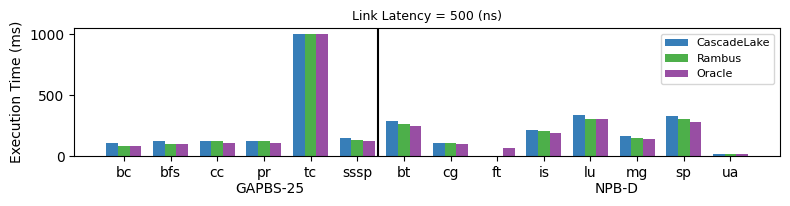

In [38]:
app_gap = df_gap25_cas_500ns['app']
gap_cas = df_gap25_cas_500ns['simSeconds'].astype(float) * 1000
gap_ram = df_gap25_ram_500ns['simSeconds'].astype(float) * 1000
gap_orc = df_gap25_orc_500ns['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbD_cas_500ns['app']
npb_cas = df_npbD_cas_500ns['simSeconds'].astype(float) * 1000
npb_ram = df_npbD_ram_500ns['simSeconds'].astype(float) * 1000
npb_orc = df_npbD_orc_500ns['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("Link Latency = 500 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

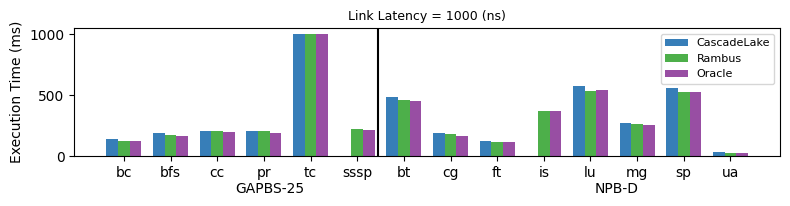

In [39]:
app_gap = df_gap25_cas_1us['app']
gap_cas = df_gap25_cas_1us['simSeconds'].astype(float) * 1000
gap_ram = df_gap25_ram_1us['simSeconds'].astype(float) * 1000
gap_orc = df_gap25_orc_1us['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_cas[i],   width=1, color=cmap(1), label='CascadeLake' if i==0 else None)
    plt.bar(i*4+1, gap_ram[i],   width=1, color=cmap(2), label='Rambus' if i==0 else None)
    plt.bar(i*4+2, gap_orc[i],   width=1, color=cmap(3), label='Oracle' if i==0 else None)

offset = i*5-2
app_npb = df_npbD_cas_1us['app']
npb_cas = df_npbD_cas_1us['simSeconds'].astype(float) * 1000
npb_ram = df_npbD_ram_1us['simSeconds'].astype(float) * 1000
npb_orc = df_npbD_orc_1us['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_cas[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_ram[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_orc[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.title("Link Latency = 1000 (ns)", fontsize = 9)
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

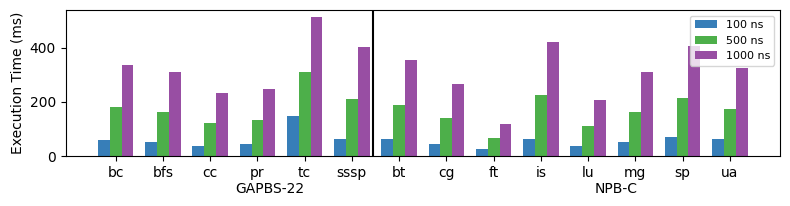

In [40]:
app_gap = df_gap22_noDC_100ns['app']
gap_100 = df_gap22_noDC_100ns['simSeconds'].astype(float) * 1000
gap_500 = df_gap22_noDC_500ns['simSeconds'].astype(float) * 1000
gap_1000 = df_gap22_noDC_1us['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_100[i],   width=1, color=cmap(1), label='100 ns' if i==0 else None)
    plt.bar(i*4+1, gap_500[i],   width=1, color=cmap(2), label='500 ns' if i==0 else None)
    plt.bar(i*4+2, gap_1000[i],   width=1, color=cmap(3), label='1000 ns' if i==0 else None)

offset = i*5-2
app_npb = df_npbC_noDC_100ns['app']
npb_100 = df_npbC_noDC_100ns['simSeconds'].astype(float) * 1000
npb_500 = df_npbC_noDC_500ns['simSeconds'].astype(float) * 1000
npb_1000 = df_npbC_noDC_1us['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_100[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_500[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_1000[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-22")
plt.figtext(0.75, 0.01, "NPB-C")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")

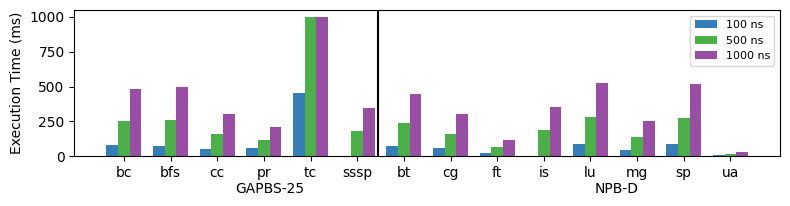

In [41]:
app_gap =  df_gap25_noDC_100ns['app']
gap_100 =  df_gap25_noDC_100ns['simSeconds'].astype(float) * 1000
gap_500 =  df_gap25_noDC_500ns['simSeconds'].astype(float) * 1000
gap_1000 = df_gap25_noDC_1us['simSeconds'].astype(float) * 1000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(8,2)


for i,app in enumerate(app_gap):
    plt.bar(i*4,   gap_100[i],   width=1, color=cmap(1), label='100 ns' if i==0 else None)
    plt.bar(i*4+1, gap_500[i],   width=1, color=cmap(2), label='500 ns' if i==0 else None)
    plt.bar(i*4+2, gap_1000[i],   width=1, color=cmap(3), label='1000 ns' if i==0 else None)

offset = i*5-2
app_npb =  df_npbD_noDC_100ns['app']
npb_100 =  df_npbD_noDC_100ns['simSeconds'].astype(float) * 1000
npb_500 =  df_npbD_noDC_500ns['simSeconds'].astype(float) * 1000
npb_1000 = df_npbD_noDC_1us['simSeconds'].astype(float) * 1000
for i,app in enumerate(app_npb): 
    plt.bar(offset+i*4+1,   npb_100[i],     width=1, color=cmap(1))
    plt.bar(offset+i*4+2,   npb_500[i],   width=1, color=cmap(2))
    plt.bar(offset+i*4+3,   npb_1000[i],   width=1, color=cmap(3))

plt.figtext(0.3, 0.01, "GAPBS-25")
plt.figtext(0.75, 0.01, "NPB-D")

plt.xticks(np.arange(14)*4+1, list(app_gap)+list(app_npb))
plt.axvline(x=offset-0.25, color='black')

plt.ylabel("Execution Time (ms)")
plt.legend(fontsize=8, ncol=1)
plt.tight_layout()
#plt.savefig("../figures/cs1_all_bips.pdf")